In [1]:
# Importing all the project pre-requisites
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Import essential models and functions from plotly
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Allows us to use Plotly offline
init_notebook_mode(connected=True)

In [2]:
data1=pd.read_csv("https://raw.githubusercontent.com/guptajay/world-happiness-report/master/data/factor_of_happiness2018.csv")
data2=pd.read_csv("https://raw.githubusercontent.com/guptajay/world-happiness-report/master/data/factor_of_happiness2018(2).csv")

print("Data type : ", type(data2))
print("Data dims : ", data2.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (156, 15)


In [3]:
# Get the overview of the data
data2.head()

,country,Region indicator,"Life ladder, 2015-2017","Standard error, life ladder, 2015-2017","Log of GDP per person, 2015-2017","GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Standard error, social support, 2015-2017","Freedom to make life choices, 2015-2017","Standard error, freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Standard error, generosity, 2015-2017","Perceptions of corruption, 2015-2017","Standard error, perceptions of corruption, 2015-2017"
0,Afghanistan,South Asia,3.631519,0.042360,7.462610,1741.687500,52.013329,0.525075,0.011119,0.445294,0.011449,0.179054,0.008331,0.879705,0.006009
1,Albania,Central and Eastern Europe,4.586040,0.055813,9.338126,11363.095700,68.871552,0.639576,0.010078,0.726340,0.009421,0.259975,0.009048,0.886778,0.005775
2,Algeria,Middle East and North Africa,5.294638,0.057087,9.540703,13914.723630,65.604858,0.776977,0.011171,0.439177,0.019161,0.128988,0.012327,0.698343,0.019293
3,Angola,Sub-Saharan Africa,3.794838,0.079919,8.741957,6260.132813,52.460709,0.765275,0.015744,0.374173,0.018346,0.106829,0.011499,0.833540,0.016014
4,Argentina,Latin America and Caribbean,6.387958,0.049497,9.842001,18807.310550,67.398483,0.905565,0.006363,0.853390,0.007526,0.163174,0.007777,0.847882,0.006881


In [4]:
# Information about the Variables
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 15 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   country                                                       156 non-null    object 
 1   Region indicator                                              156 non-null    object 
 2   Life ladder, 2015-2017                                        156 non-null    float64
 3   Standard error, life ladder, 2015-2017                        156 non-null    float64
 4   Log of GDP per person, 2015-2017                              152 non-null    float64
 5   GDP per person, 2015-2017                                     152 non-null    float64
 6   Healthy life expectancy, 2015-2017                            153 non-null    float64
 7   Social support, 2015-2017                                     155 non-n

In [5]:
# Sort the dataset by Countries instead of Happiness Score
data1.sort_values(by = ["Country"], inplace = True, ascending = True)
data1 = data1.reset_index(drop=True)
data1 = pd.DataFrame(data1[:156])
data = pd.concat([data1,data2],axis=1)

# Convert all Variable Names to UPPERCASE
data.columns = data.columns.str.upper()

# Remove all spaces and dots from Variable Names
data.columns = data.columns.str.replace(".","")
data.columns = data.columns.str.replace(" ","_")
data.columns = data.columns.str.replace(":","")
data.columns = data.columns.str.replace("+","")
data.columns = data.columns.str.replace(",","")

<ipython-input-5-6fb814b7b5dd>:11: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-5-6fb814b7b5dd>:14: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [6]:
# Extracting the required variables from the dataframe
extracts = ["COUNTRY", "HAPPINESS_SCORE", "LOG_OF_GDP_PER_PERSON_2015-2017", "GDP_PER_PERSON_2015-2017", "HEALTHY_LIFE_EXPECTANCY_2015-2017", \
            "SOCIAL_SUPPORT_2015-2017", "FREEDOM_TO_MAKE_LIFE_CHOICES_2015-2017", \
            "GENEROSITY_2015-2017_WITHOUT_ADJUSTMENT_FOR_GDP_PER_PERSON", "PERCEPTIONS_OF_CORRUPTION_2015-2017"]

data = pd.DataFrame(data[extracts])

In [7]:
# Rename the columns of the dataframe for easier readability
data.rename(columns = {'GDP_PER_PERSON_2015-2017': 'GDP_PER_PERSON'}, inplace = True)
data.rename(columns = {'LOG_OF_GDP_PER_PERSON_2015-2017': 'LOG_OF_GDP_PER_PERSON'}, inplace = True)
data.rename(columns = {'FREEDOM_TO_MAKE_LIFE_CHOICES_2015-2017': 'FREEDOM'}, inplace = True)
data.rename(columns = {'HEALTHY_LIFE_EXPECTANCY_2015-2017': 'HEALTHY_LIFE_EXPECTANCY'}, inplace = True)
data.rename(columns = {'SOCIAL_SUPPORT_2015-2017': 'SOCIAL_SUPPORT'}, inplace = True)
data.rename(columns = {'GENEROSITY_2015-2017_WITHOUT_ADJUSTMENT_FOR_GDP_PER_PERSON': 'GENEROSITY'}, inplace = True)
data.rename(columns = {'PERCEPTIONS_OF_CORRUPTION_2015-2017': 'PERCEPTIONS_OF_CORRUPTION'}, inplace = True)

In [8]:
# Remove duplicate columns (if any)
data = data.loc[:,~data.columns.duplicated()]
data.head()

,COUNTRY,HAPPINESS_SCORE,LOG_OF_GDP_PER_PERSON,GDP_PER_PERSON,HEALTHY_LIFE_EXPECTANCY,SOCIAL_SUPPORT,FREEDOM,GENEROSITY,PERCEPTIONS_OF_CORRUPTION
0,Afghanistan,3.632,7.462610,1741.687500,52.013329,0.525075,0.445294,0.179054,0.879705
1,Albania,4.586,9.338126,11363.095700,68.871552,0.639576,0.726340,0.259975,0.886778
2,Algeria,5.295,9.540703,13914.723630,65.604858,0.776977,0.439177,0.128988,0.698343
3,Angola,3.795,8.741957,6260.132813,52.460709,0.765275,0.374173,0.106829,0.833540
4,Argentina,6.388,9.842001,18807.310550,67.398483,0.905565,0.853390,0.163174,0.847882


In [9]:
data1 = dict(type = 'choropleth', 
           locations = data['COUNTRY'],
           locationmode = 'country names',
           z = data['HAPPINESS_SCORE'], 
           text = data['COUNTRY'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Index 2018', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data1], layout=layout)
iplot(choromap3)

In [10]:
# Remove rows with missing values
data = data.dropna(how='any',axis=0)

# After removing missing values, reset the index
data = data.reset_index(drop=True)

In [11]:
# Summary Statistics for all Variables
data.describe().round(2)

,HAPPINESS_SCORE,LOG_OF_GDP_PER_PERSON,GDP_PER_PERSON,HEALTHY_LIFE_EXPECTANCY,SOCIAL_SUPPORT,FREEDOM,GENEROSITY,PERCEPTIONS_OF_CORRUPTION
count,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00
mean,5.35,9.17,17126.09,62.56,0.80,0.75,0.29,0.74
std,1.14,1.19,17197.39,7.87,0.12,0.14,0.18,0.18
min,2.90,6.47,647.88,43.99,0.31,0.37,0.03,0.10
25%,4.43,8.23,3742.62,56.66,0.74,0.67,0.16,0.70
50%,5.33,9.34,11400.95,64.04,0.82,0.78,0.25,0.80
75%,6.16,10.12,24852.59,68.38,0.91,0.86,0.38,0.85
max,7.63,11.46,94730.00,75.72,0.98,0.98,0.90,0.95


In [12]:
# Calculate the complete correlation matrix
data.corr().round(2)

,HAPPINESS_SCORE,LOG_OF_GDP_PER_PERSON,GDP_PER_PERSON,HEALTHY_LIFE_EXPECTANCY,SOCIAL_SUPPORT,FREEDOM,GENEROSITY,PERCEPTIONS_OF_CORRUPTION
HAPPINESS_SCORE,1.00,0.82,0.77,0.80,0.77,0.55,0.56,-0.43
LOG_OF_GDP_PER_PERSON,0.82,1.00,0.85,0.88,0.75,0.37,0.50,-0.35
GDP_PER_PERSON,0.77,0.85,1.00,0.75,0.62,0.39,0.58,-0.58
HEALTHY_LIFE_EXPECTANCY,0.80,0.88,0.75,1.00,0.70,0.37,0.47,-0.33
SOCIAL_SUPPORT,0.77,0.75,0.62,0.70,1.00,0.41,0.43,-0.26
FREEDOM,0.55,0.37,0.39,0.37,0.41,1.00,0.49,-0.47
GENEROSITY,0.56,0.50,0.58,0.47,0.43,0.49,1.00,-0.50
PERCEPTIONS_OF_CORRUPTION,-0.43,-0.35,-0.58,-0.33,-0.26,-0.47,-0.50,1.00


<AxesSubplot:>

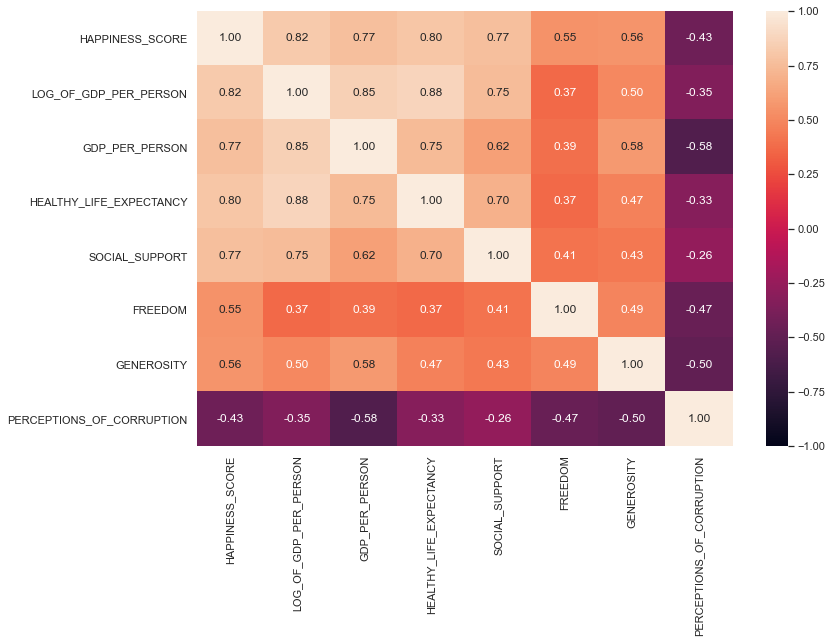

In [13]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [14]:
# Dataframe of the Happiness Score
happiness_score = pd.DataFrame(data["HAPPINESS_SCORE"])
happiness_score.describe().round(2)

,HAPPINESS_SCORE
count,142.00
mean,5.35
std,1.14
min,2.90
25%,4.43
50%,5.33
75%,6.16
max,7.63


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

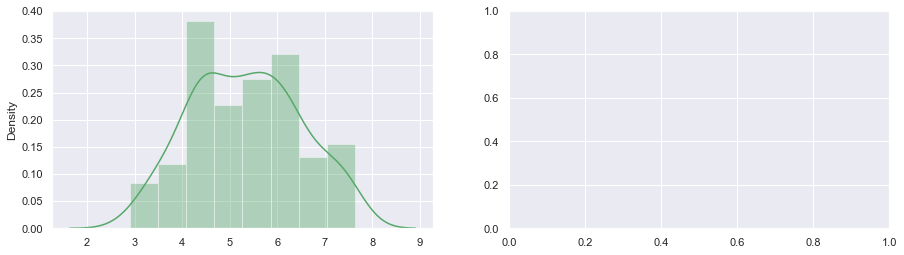

In [15]:
f,axes = plt.subplots(1,2,figsize=(15,4))
sb.distplot(happiness_score,kde=True,hist=True,color="g",ax=axes[0])
sb.violinplot(happiness_score,ax=axes[1],color="r")

In [16]:
# Add our Happiness Category into the Happiness_Score dataframe
happiness=[]
for i in happiness_score["HAPPINESS_SCORE"]:
    if i<4:
        happiness.append("UNHAPPY")
    elif 4<=i<=6:
        happiness.append("NORMAL")
    else:
        happiness.append("HAPPY")

# Join our Hapiness_Score dataframe into the main dataframe
pred_happiness = pd.DataFrame(happiness,columns=["PREDICTED_HAPPINESS"])
pred_happiness = pd.DataFrame(pred_happiness["PREDICTED_HAPPINESS"].astype('category'))
data = pd.concat([data,pred_happiness],axis=1)

In [17]:
# Remove any duplicate columns (if any)
data = data.loc[:,~data.columns.duplicated()]
data.head()

,COUNTRY,HAPPINESS_SCORE,LOG_OF_GDP_PER_PERSON,GDP_PER_PERSON,HEALTHY_LIFE_EXPECTANCY,SOCIAL_SUPPORT,FREEDOM,GENEROSITY,PERCEPTIONS_OF_CORRUPTION,PREDICTED_HAPPINESS
0,Afghanistan,3.632,7.462610,1741.687500,52.013329,0.525075,0.445294,0.179054,0.879705,UNHAPPY
1,Albania,4.586,9.338126,11363.095700,68.871552,0.639576,0.726340,0.259975,0.886778,NORMAL
2,Algeria,5.295,9.540703,13914.723630,65.604858,0.776977,0.439177,0.128988,0.698343,NORMAL
3,Angola,3.795,8.741957,6260.132813,52.460709,0.765275,0.374173,0.106829,0.833540,UNHAPPY
4,Argentina,6.388,9.842001,18807.310550,67.398483,0.905565,0.853390,0.163174,0.847882,HAPPY


In [18]:
data["PREDICTED_HAPPINESS"].value_counts()

NORMAL     85
HAPPY      40
UNHAPPY    17
Name: PREDICTED_HAPPINESS, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of Countries')

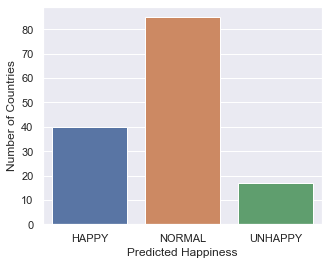

In [19]:
f, axes = plt.subplots(1, 1, figsize=(5, 4))
sb.countplot(data["PREDICTED_HAPPINESS"])
plt.xlabel("Predicted Happiness")
plt.ylabel("Number of Countries")

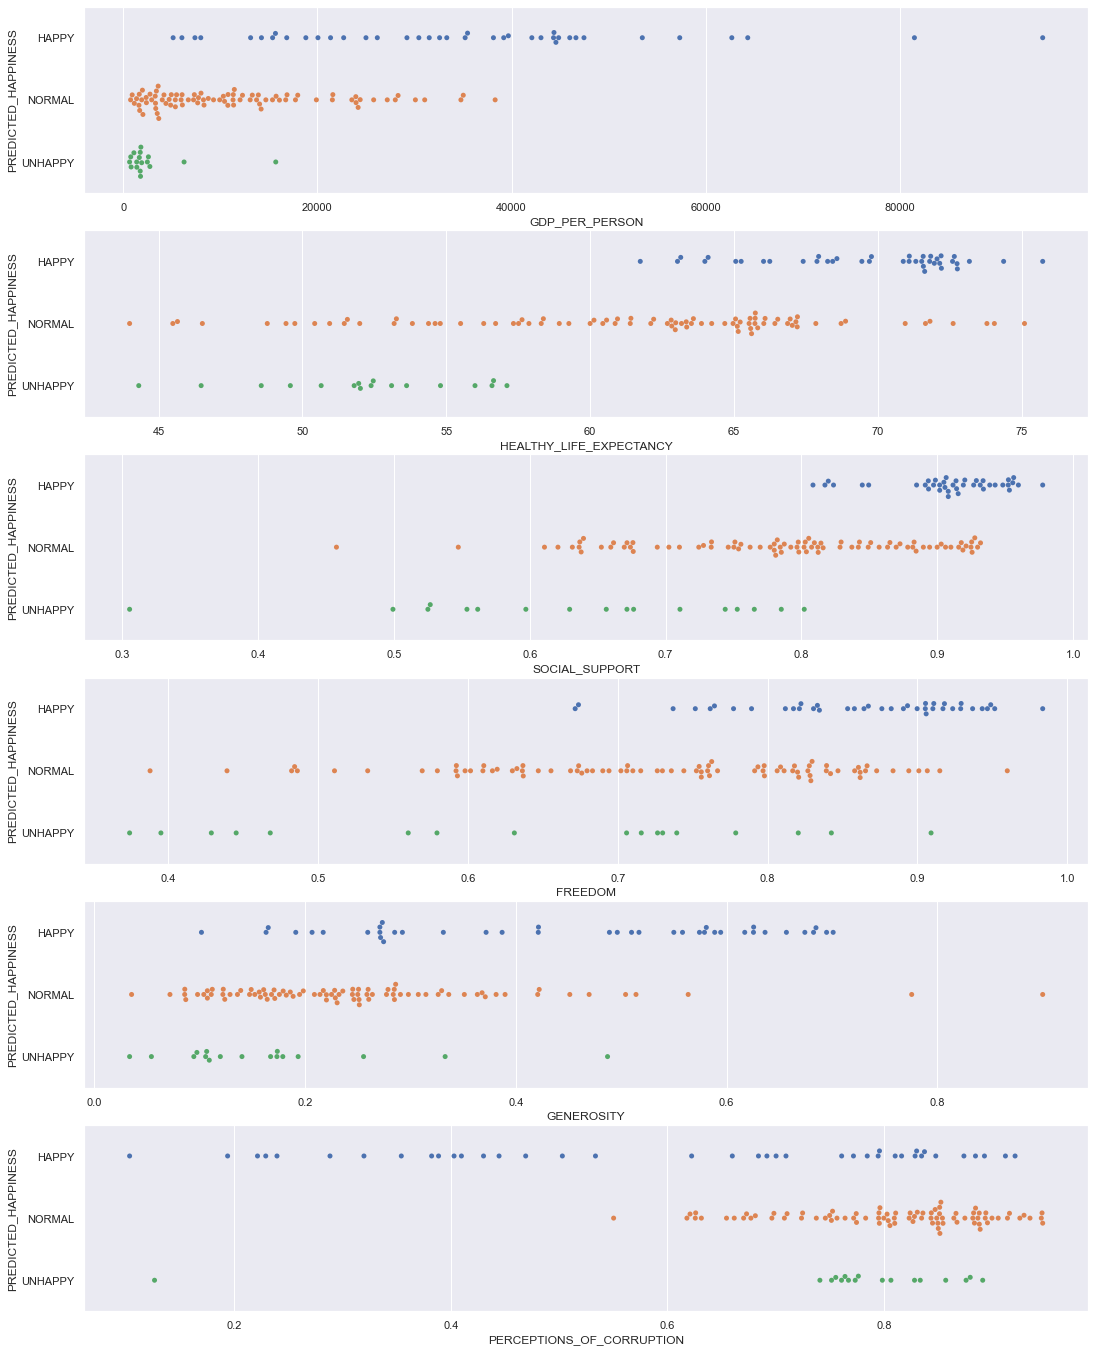

In [20]:
# Swarm plot for all the variables
predictors=["GDP_PER_PERSON","HEALTHY_LIFE_EXPECTANCY","SOCIAL_SUPPORT","FREEDOM","GENEROSITY","PERCEPTIONS_OF_CORRUPTION"]
f,axes=plt.subplots(6,1,figsize=(18,24))
count=0
for var in predictors:
    sb.swarmplot(x=var,y="PREDICTED_HAPPINESS",data=data,orient="h",ax=axes[count])
    count+=1

In [21]:
# Recall the World Happiness Dataset
predictors=["GDP_PER_PERSON","HEALTHY_LIFE_EXPECTANCY","SOCIAL_SUPPORT","GENEROSITY"]
x=pd.DataFrame(data[predictors])
y=pd.DataFrame(data["PREDICTED_HAPPINESS"])

# Split the Dataset into Train and Test with a test size of 0.25
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state = 42)

# Create Random Forest Classifier
forest = RandomForestClassifier(n_estimators = 80, random_state = 42, max_depth = 10, min_samples_split = 0.1, min_samples_leaf = 0.001)
forest.fit(x_train,y_train)

# Predict Happiness using Random Forest Classifier
y_train_pred_forest=forest.predict(x_train)
y_test_pred_forest=forest.predict(x_test)

# Check the Goodness of Fit (by Random Forest Classifier)
print("Goodness of fit by using Random Forest Classifier:")
print("\tThe prediction accuracy on Train set: ",round(forest.score(x_train,y_train),2))
print("\tThe prediction accuracy on Test set: ",round(forest.score(x_test,y_test), 2))
print()

<ipython-input-21-a9a282961618>:11: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Goodness of fit by using Random Forest Classifier:
	The prediction accuracy on Train set:  0.9
	The prediction accuracy on Test set:  0.72



In [22]:
# Prepare X_train, X_test, y_train, y_test
X = data[["LOG_OF_GDP_PER_PERSON", "HEALTHY_LIFE_EXPECTANCY", "SOCIAL_SUPPORT", "GENEROSITY"]]
y = data["HAPPINESS_SCORE"]
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=10)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print("Training set R^2:", linreg.score(X_train, y_train))
print("Test set R^2:", linreg.score(X_test, y_test))

Training set R^2: 0.7720513073696835
Test set R^2: 0.7384119055826679


In [ ]:
print()

name = input("Enter your Country Name: ")

print("--------------------------------")

print("Let us analyse the feasabiliy [Happiness Category/Score] of", name, "by entering some important features: ")

print()
print("--------------------------------")
print()

print("Reference: Average GDP Per Capita of all Countries: USD 17000, Singapore's GDP Per Capita: USD 81000")
while True:
    try:
        gdp = float(input("Enter the Average GDP Per Capita for your Country (in USD): "))
        break
    except ValueError:
        print("Please enter a valid input.")
        print()

print()
print("--------------------------------")
print()

while True:
    try:
        life_expectancy = float(input("Enter the Average Life Expectancy of your Citizens: (Age) "))
        break
    except ValueError:
        print("Please enter a valid input.")
        print()

print()
print("--------------------------------")
print()

print("Reference Question: Social Support - If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?")

while True:
    try:
        social_support=float(input("Enter the Social Support Index (Choose between 0 and 1, 0 - Lowest : 1 - Highest): "))
        break
    except ValueError:
        print("Please enter a valid input.")
        print()

print()
print("--------------------------------")
print()

print("Reference Question: Generosity - Have you donated money to a charity in the past month?")

while True:
    try:
        generosity =float(input("How generous are people in your Country? (Choose between 0 and 1, 0 - Lowest : 1 - Highest): "))
        break
    except ValueError:
        print("Please enter a valid input.")
        print()

print()
print("--------------------------------")
print()
# Create a new dataframe for user input data
new_country = {"GDP_PER_PERSON": [gdp] ,"HEALTHY_LIFE_EXPECTANCY": [life_expectancy] ,"SOCIAL_SUPPORT": [social_support] \
              ,"GENEROSITY": [generosity]}
new_country = pd.DataFrame(new_country)

# Predict happiness category using user input data
y_prob = forest.predict_proba(new_country)

# Extract different probabilites into variables
y_prob1 = pd.DataFrame(list(y_prob[:,0])[0],columns=["Probability Happy"],index=new_country.index)
y_prob2 = pd.DataFrame(list(y_prob[:,1])[0],columns=["Probability Normal"],index=new_country.index)
y_prob3 = pd.DataFrame(list(y_prob[:,2])[0],columns=["Probability Unhappy"],index=new_country.index)


# Create a dataframe with predicted probabilities
data_comb = pd.concat([new_country, y_prob1, y_prob2, y_prob3], axis=1)

# Extract the probabilities
happy = list(y_prob[:,0])[0]
normal = list(y_prob[:,1])[0]
unhappy = list(y_prob[:,2])[0]

print()


def find_nearest_country(gdp, hle, scl):
    def calculate_distance(x, gdp, hle, scl):
        gdp_dif = np.log((x["LOG_OF_GDP_PER_PERSON"] - gdp)**2)
        hle_dif = np.log((x["HEALTHY_LIFE_EXPECTANCY"] - hle)**2)
        scl_dif = np.log((x["SOCIAL_SUPPORT"] - scl)**2)
        return gdp_dif + hle_dif + scl_dif
      # Extract necessary data to work with graphs and training model
    data1 = data[["COUNTRY", "LOG_OF_GDP_PER_PERSON", "HEALTHY_LIFE_EXPECTANCY","SOCIAL_SUPPORT"]]
    data1['distances'] = data1.apply(lambda x: calculate_distance(x, gdp, hle, scl), axis=1)
    index = data1['distances'].values.argmin()
    found = data1.iloc[index, :]
    min_distance = data1['distances'].min()
    
    
    # plot the graph to see how it is different to our data
    # whole data
    text1 = data[['COUNTRY','GDP_PER_PERSON']].apply(lambda x: "{}, {:.3f}".format(x[0], x[1]), axis=1)
    trace0 = go.Scatter(
        x = data1['SOCIAL_SUPPORT'],
        y = data1['HEALTHY_LIFE_EXPECTANCY'],
        text = text1,
        mode='markers',
        marker=dict(
            size = data['GDP_PER_PERSON'].apply(lambda x: x**0.4)
        ),
        showlegend=False
    )
    # Your country
    trace1 = go.Scatter(
        x = [scl],
        y = [hle],
        text = "Your country",
        mode = 'markers',
        marker = dict (
            size = [gdp**0.4],
            color='rgb(255, 0, 0)'
        ),
          showlegend=False
    )
    
    # Nearest Country to your country
    trace2 = go.Scatter(
        
        x = [found['SOCIAL_SUPPORT']],
        y = [found['HEALTHY_LIFE_EXPECTANCY']],
        text = found['COUNTRY'],
        mode='markers',
        marker=dict(
            size = [np.exp(found['LOG_OF_GDP_PER_PERSON'])**0.4],
            color = 'rgb(255, 255, 0)'
        ),
        showlegend=False
    )
    
    # layout
    layout = go.Layout(
    title=go.layout.Title(
        text='Find your country',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Social Support',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
                    )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Healthy Life Expectancy',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
    
    graph = [trace0, trace1, trace2]
    fig = go.Figure(data=graph, layout=layout)
    py.iplot(fig, filename='abc')
    
    print()
    print("--------------------------------")
    print()
    print("Legend:")
    print('Red:    Your Country (Virtual Country)')
    print('Yellow: The Country most similar to your Country (Actual Country)')
    print()
    print("--------------------------------")
    print()

    return found, min_distance
def program():
    hle = life_expectancy       # HEALTHY_LIFE_EXPECTANCY
    scl = social_support       # SOCIAL_SUPPORT
    choice = 0

    # Find country on the plot
    found_data, min_distance = find_nearest_country(gdp, hle, scl)
    if min_distance >= 30:
        print(min_distance)
        print("Your inputs seem a little bit strange. You may want to change them.")
    else:
        print()
        print("--------------------------------")
        print()
        print("{} is the country that has the most similar features to yours".format(found_data[0]))
        print()
        print("--------------------------------")
        print()


# Select the highest probability
if (normal > happy and normal > unhappy):
    print("Your Country can be better! We can say that the citizens of", name, \
          "will be LIKELY HAPPY / NORMAL with a probability of", round(normal*100, 2), "%")
elif (happy > normal and happy > unhappy):
    print("Congrats! We can say that the citizens of", name, "will be HAPPY with a probability of", round(happy*100, 2), "%")
else:
    print("Oh No! We can say that the citizens of", name, "will be UNHAPPY with a probability of", round(unhappy*100, 2), "%")
    
print()
print("--------------------------------")
print()

program()


Enter your Country Name: india
--------------------------------
Let us analyse the feasabiliy [Happiness Category/Score] of india by entering some important features: 

--------------------------------

Reference: Average GDP Per Capita of all Countries: USD 17000, Singapore's GDP Per Capita: USD 81000
Enter the Average GDP Per Capita for your Country (in USD): rupees
Please enter a valid input.



In [ ]:
data = pd.read_excel('data/data.xls', sheet_name = 'Table2.1')

clean_data = data.copy()

# Rename the Country Column
clean_data.rename(columns = {'Country name': 'Country'}, inplace = True)

# Convert all Variable Names to UPPERCASE
clean_data.columns = clean_data.columns.str.upper()

# Remove all spaces and dots from Variable Names
clean_data.columns = clean_data.columns.str.replace(".","")
clean_data.columns = clean_data.columns.str.replace(" ","_")
clean_data.replace(' ', '_', regex=True)

clean_data.sample(n = 10)

# Set index of the dataframe to Country
clean_data = clean_data.set_index('COUNTRY')

# Select Singapore, United States and Canada 
clean_data = clean_data.loc[["Singapore", "United States", "Canada"]]

# Select the required variables
sg_data = clean_data[['YEAR', 'DEMOCRATIC_QUALITY', 'PERCEPTIONS_OF_CORRUPTION', 'LIFE_LADDER', 'SOCIAL_SUPPORT']]

# Removing NULL values
sg_data = sg_data[pd.notnull(sg_data['PERCEPTIONS_OF_CORRUPTION'])]
sg_data = sg_data[pd.notnull(sg_data['DEMOCRATIC_QUALITY'])]
sg_data = sg_data[pd.notnull(sg_data['SOCIAL_SUPPORT'])]